In [1]:
import netCDF4 as nc

import matplotlib as mpl
from matplotlib import pyplot as plt

import numpy as np
import xarray as xr

from scipy import signal
import scipy


In [18]:
path = '/Users/zcaspar/codes/Diagnostics/'
corr1 = xr.open_dataset(path+'uucorr_20.nc')
uu = corr1.uu/corr1.uu.sel(lag=0)
uu

vv = xr.open_dataset(path+'vvcorr_20.nc')

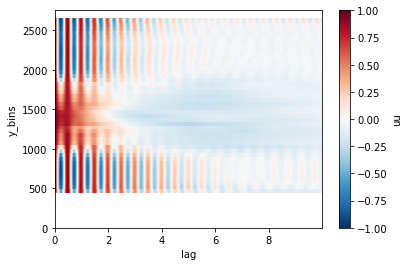

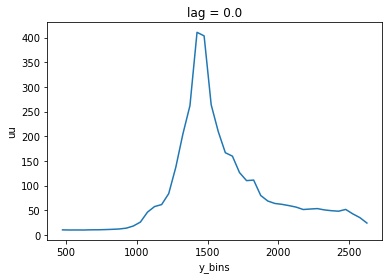

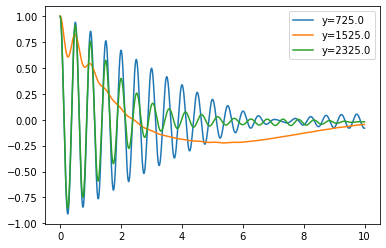

In [3]:
uu.plot()
plt.figure()
corr1.uu.sel(lag=0).plot()
plt.figure()
plt.plot(uu.lag,uu.sel(y_bins=700,method='nearest'),label='y=%s'%uu.sel(y_bins=700,method='nearest').y_bins.values)
plt.plot(uu.lag,uu.sel(y_bins=1500,method='nearest'),label='y=%s'%uu.sel(y_bins=1500,method='nearest').y_bins.values)
plt.plot(uu.lag,uu.sel(y_bins=2300,method='nearest'),label='y=%s'%uu.sel(y_bins=2300,method='nearest').y_bins.values)
plt.legend()

In [4]:
def Ctilde(t,Tt,nu):
    return np.exp(-t/Tt)*np.cos(2*np.pi*om*t)*np.cos(2*np.pi*nu*t)
def Cbar(t,Tb,Om):
    return np.exp(-t/Tb)*np.cos(2*np.pi*Om*t)
def C(t,Tt,nu,Tb,Omega,r):
    return (1-r)*Cbar(t,Tb,Omega)+r*Ctilde(t,Tt,nu)

In [7]:
tau = uu.lag 
om = 2 #internal waves frequency
Tt = 1 #nonstationarity timescale
y1 = uu.sel(y_bins=700,method='nearest')
y2 = uu.sel(y_bins=1500,method='nearest')
y3 = uu.sel(y_bins=2300,method='nearest')
y4 = uu.sel(y_bins=1700,method='nearest')

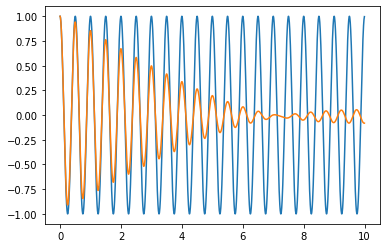

In [8]:
plt.plot(tau,np.cos(2*np.pi*om*tau)) #Si l'onde était stationnaire
plt.plot(tau,y1)

### Comparaison modèles théoriques et données (à la main):
On cherche à approcher au plus près les modèles théoriques à nos données en changeant différents paramètres ($\overline{T}$, $\widetilde{T}_{ns}$ et $\Omega$)

#### Theoritical model for  $\widetilde{C}$ :
$\widetilde{C} = e^{-\tau/\widetilde{T}_{ns}}cos(\omega\tau)$

Since we observe a node in our data we multiply arbitrarily by a term : $cos(\nu\tau)$

=> $\widetilde{C} = e^{-\tau/\widetilde{T}_{ns}}cos(\omega\tau)cos(\nu\tau)$
we will first vary $\widetilde{T}_{ns}$ then $\nu$

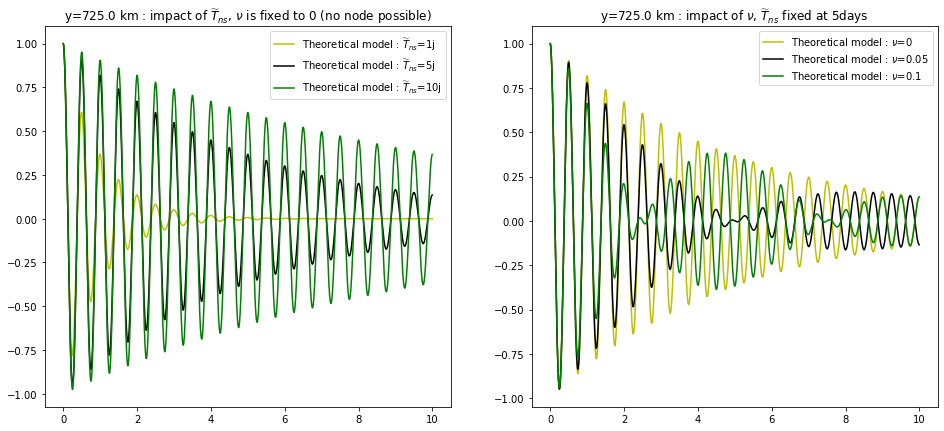

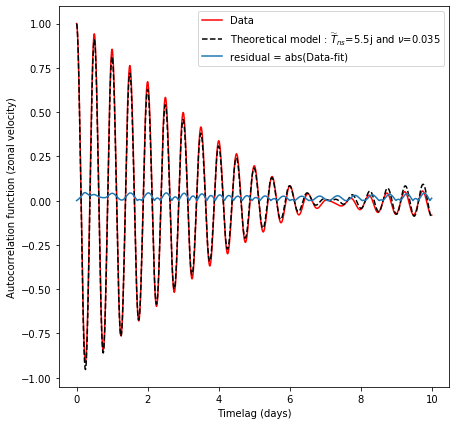

In [77]:
#A priori, we can expect only waves in this area (south of the jet) so we compare only to Ctilde function: 
fig = plt.figure(figsize=(16,7))
ax = fig.add_subplot(1,2,1)
ax.set_title(r'y=%s km : impact of $\widetilde{T}_{ns}$, $\nu$ is fixed to 0 (no node possible)'%uu.sel(y_bins=700,method='nearest').y_bins.values)
#plt.plot(tau,f,c='r',label='Data')
ax.plot(tau,Ctilde(tau,1,0.),'y',label=r'Theoretical model : $\widetilde{T}_{ns}$=%s'%1j)
ax.plot(tau,Ctilde(tau,5,0.),'k',label=r'Theoretical model : $\widetilde{T}_{ns}$=%s'%5j)
ax.plot(tau,Ctilde(tau,10,0.),'g',label=r'Theoretical model : $\widetilde{T}_{ns}$=%s'%10j)
plt.legend(loc='upper right')
ax = fig.add_subplot(1,2,2)
ax.set_title(r'y=%s km : impact of $\nu$, $\widetilde{T}_{ns}$ fixed at 5days'%uu.sel(y_bins=700,method='nearest').y_bins.values)
#plt.plot(tau,f,c='r',label='Data')
ax.plot(tau,Ctilde(tau,5,0.0),'y',label=r'Theoretical model : $\nu$=%s'%0)
ax.plot(tau,Ctilde(tau,5,0.05),'k',label=r'Theoretical model : $\nu$=%s'%0.05)
ax.plot(tau,Ctilde(tau,5,0.1),'g',label=r'Theoretical model : $\nu$=%s'%0.1)
plt.legend(loc='upper right')
plt.figure(figsize=(7,7))
#plt.suptitle(r'y=%s km : best suited $\widetilde{T}_{ns}$ and $\nu$ '%uu.sel(y_bins=700,method='nearest').y_bins.values)
plt.plot(tau,y1,c='r',label='Data')
plt.plot(tau,Ctilde(tau,5.5,0.035),'k--',label=r'Theoretical model : $\widetilde{T}_{ns}$=%s and $\nu$=%s'%(5.5j,0.035))
plt.plot(tau, np.abs(y1-Ctilde(tau,5.5,0.035)),label='residual = abs(Data-fit)')
plt.legend()
plt.xlabel('Timelag (days)');plt.ylabel('Autocorrelation function (zonal velocity)')
plt.savefig('/Users/zcaspar/Documents/Figs/y1_tilde.png')

#### Comments :
1 : $\widetilde{T}_{ns}$ controls the exponential decay of the envelop of the oscillations due to the waves. It won't create a node like it is observed in the data. However we know $\widetilde{T}_{ns}$ must not be to large otherwise the decay will be faster than the one observe. The oscillations are not completly damped in the data for lag=10. $\widetilde{T}_{ns}$=5days seems a good start to approximate the data.

2 : $\nu\neq0$ introduces a sinusoidal modulation of the oscillation from the data we expect a slow modulation, $\nu\ll\omega$. We see in the figure that $\nu=0.1$ leads to 2 nodes and $\nu=0.05$ to. node at shorter time than the one in the data. From this we search $\nu$ between 0 and 0.05.  

3 : By playing with the parameters taking into account the remarks made previously, we find $\widetilde{T}_{ns}$=5.5days and $\nu$=0.035$rad.s^{-1}$ an acceptable fit.


#### North from the jet (y=2325km): 
we use use again only the model for $\widetilde{C}$ as in the first case.

This time no node is expected so we can investigate first $\widetilde{T}_{ns}$ while fixing $\nu$ at 0.

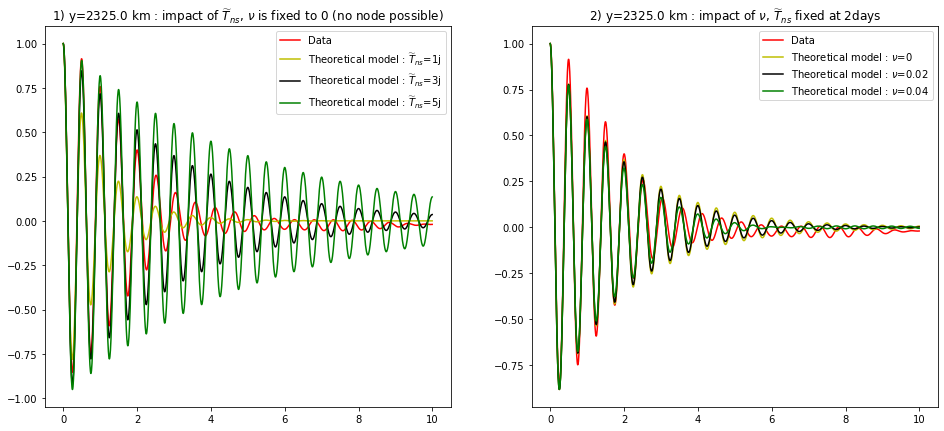

In [23]:
fig = plt.figure(figsize=(16,7))
ax = fig.add_subplot(1,2,1)
ax.set_title(r'1) y=%s km : impact of $\widetilde{T}_{ns}$, $\nu$ is fixed to 0 (no node possible)'%
             uu.sel(y_bins=2300,method='nearest').y_bins.values)
ax.plot(tau,uu.sel(y_bins=2300,method='nearest'),c='r',label='Data')
ax.plot(tau,Ctilde(tau,1,0.),'y',label=r'Theoretical model : $\widetilde{T}_{ns}$=%s'%1j)
ax.plot(tau,Ctilde(tau,3,0.),'k',label=r'Theoretical model : $\widetilde{T}_{ns}$=%s'%3j)
ax.plot(tau,Ctilde(tau,5,0.),'g',label=r'Theoretical model : $\widetilde{T}_{ns}$=%s'%5j)
plt.legend(loc='upper right')
ax = fig.add_subplot(1,2,2)

ax.set_title(r'2) y=%s km : impact of $\nu$, $\widetilde{T}_{ns}$ fixed at 2days'%
          uu.sel(y_bins=2300,method='nearest').y_bins.values)
ax.plot(tau,uu.sel(y_bins=2300,method='nearest'),c='r',label='Data')
ax.plot(tau,Ctilde(tau,2,0.),'y',label=r'Theoretical model : $\nu$=%s'%0)
ax.plot(tau,Ctilde(tau,2,0.02),'k',label=r'Theoretical model : $\nu$=%s'%0.02)
ax.plot(tau,Ctilde(tau,2,0.04),'g',label=r'Theoretical model : $\nu$=%s'%0.04)
plt.legend(loc='upper right')

#### Comments:
1 : The best $\widetilde{T}_{ns}$ expected seeems to be around 2 days. However there is a shift in the frequency of the fast oscillations that can not be reconstruct with our theoritical model.

2 : We fix this time $\widetilde{T}_{ns}$ at 2days and vary $\nu$. The variation of $\nu$ does not improve our approximation.

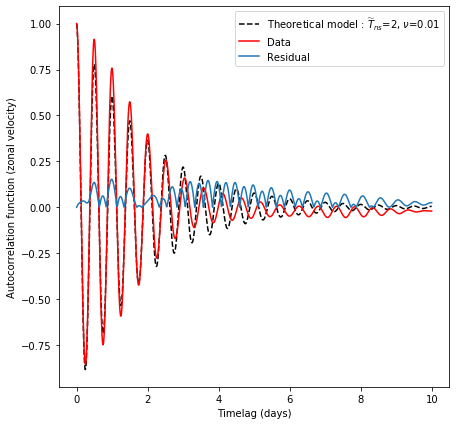

In [75]:
plt.figure(figsize=(7,7))
plt.plot(tau,Ctilde(tau,2.,0.01),'k--',label=r'Theoretical model : $\widetilde{T}_{ns}$=%s, $\nu$=%s'%(2,0.01))
plt.plot(tau,y3,c='r',label='Data')
plt.plot(tau,np.abs(y3-Ctilde(tau,2.,0.01)),label='Residual')
#plt.title('y=%s km'%uu.sel(y_bins=2300,method='nearest').y_bins.values)
plt.legend()
plt.xlabel('Timelag (days)');plt.ylabel('Autocorrelation function (zonal velocity)')
plt.savefig('/Users/zcaspar/Documents/Figs/y3_tilde.png')

#### Theoritical model for  $\overline{C}$ :
$\widetilde{C} = e^{-\tau/\overline{T}}cos(\Omega\tau)$

we will first vary $\overline{T}$ then $\Omega$

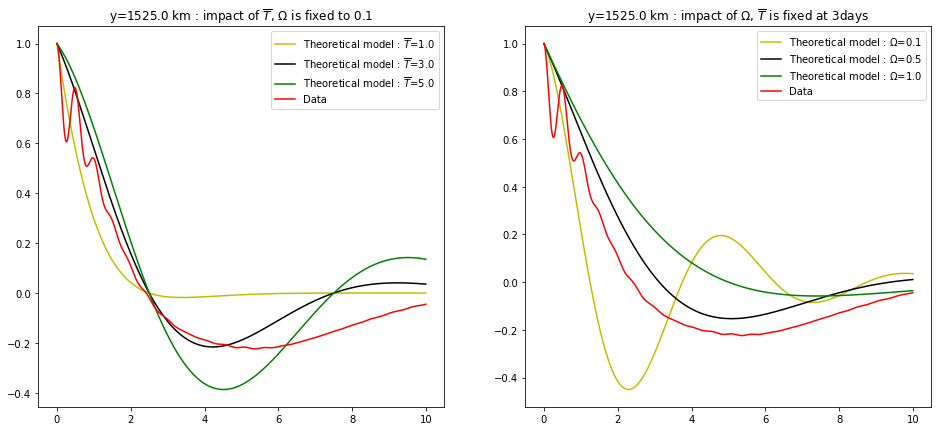

In [25]:
fig = plt.figure(figsize=(16,7))
ax = fig.add_subplot(1,2,1)
ax.set_title(r'y=%s km : impact of $\overline{T}$, $\Omega$ is fixed to 0.1'%
          uu.sel(y_bins=1500,method='nearest').y_bins.values)
ax.plot(tau, Cbar(tau,1,0.1),'y',label=r'Theoretical model : $\overline{T}$=%s'%1.)
ax.plot(tau, Cbar(tau,3,0.1),'k',label=r'Theoretical model : $\overline{T}$=%s'%3.)
ax.plot(tau, Cbar(tau,5,0.1),'g',label=r'Theoretical model : $\overline{T}$=%s'%5.)
ax.plot(tau,y2,c='r',label='Data')
plt.legend()
ax=fig.add_subplot(1,2,2)
ax.set_title(r'y=%s km : impact of $\Omega$, $\overline{T}$ is fixed at 3days'%
          uu.sel(y_bins=1500,method='nearest').y_bins.values)
ax.plot(tau, Cbar(tau,3,0.2),'y',label=r'Theoretical model : $\Omega$=%s'%0.1)
ax.plot(tau, Cbar(tau,3,0.08),'k',label=r'Theoretical model : $\Omega$=%s'%0.5)
ax.plot(tau, Cbar(tau,3,0.05),'g',label=r'Theoretical model : $\Omega$=%s'%1.)
ax.plot(tau,y2,c='r',label='Data')
plt.legend()


#### Comments:
We assume that $\Omega\leq\omega$ because it is describing a slow motion. The fast oscillations at shorter times will not be described by $\bar C$. In the data we seem to see almost 1 period in the 10 days or at least the beginning of one. So we can expect $\Omega$ to be around 1/10. This one is far more difficult to fit than the pevious case.

1 : We first fix $\Omega=0.1$ and try to estimate $\bar T$ from there. We find 3 a good start for an approximation and observe at this point that $\Omega=0.1$ is surely an overestimation.

2 : From this observation we fix $\bar T$ at 3days and vary $\Omega$. We find $\Omega=0.08$ a good fit.

The last part consist at estimating the acceptable combination wich gives : $\overline{T}=3.5days$ and $\Omega=0.075$

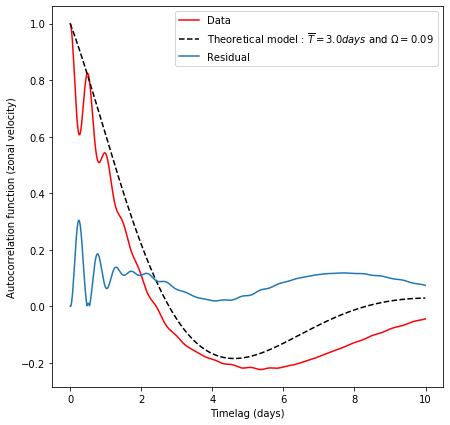

In [130]:
plt.figure(figsize=(7,7))
plt.plot(tau,y2,'r',label='Data')
plt.plot(tau,Cbar(tau,3.,0.09),'k--',label='Theoretical model : $\overline{T}=%sdays$ and $\Omega=%s$'%(3.,0.09))
plt.plot(tau,np.abs(y2-Cbar(tau,3.,0.09)),label='Residual')
plt.legend()
plt.xlabel('Timelag (days)');plt.ylabel('Autocorrelation function (zonal velocity)')
plt.savefig('/Users/zcaspar/Documents/Figs/y2_bar.png')

#### Comments : 
Here we have 2 main problems. The first one is easy to solve, the formula for $\bar C$ does not take into account the internal tides. The oscillations seen on our data will be illustrated when we take the whole formula for see (with r small but not null).

The second misfit we observe is on the envelop which is a bigger problem since it won't change when fitting to C. 

#### Complete formula:
The use only parts of the theoritical model depending on the region is not entirely satisfactory. The autocorrelation function using only the fast component is efficient south from the jet. The 2 other tested cases are not described well by simplification. We will now try and fit them to the complete formula.

#### In the jet :
For the case in the jet, we take the parameter $\Omega$ and $\overline{T}$ found previously. We will not vary them in the following part. r is supposed to be small.

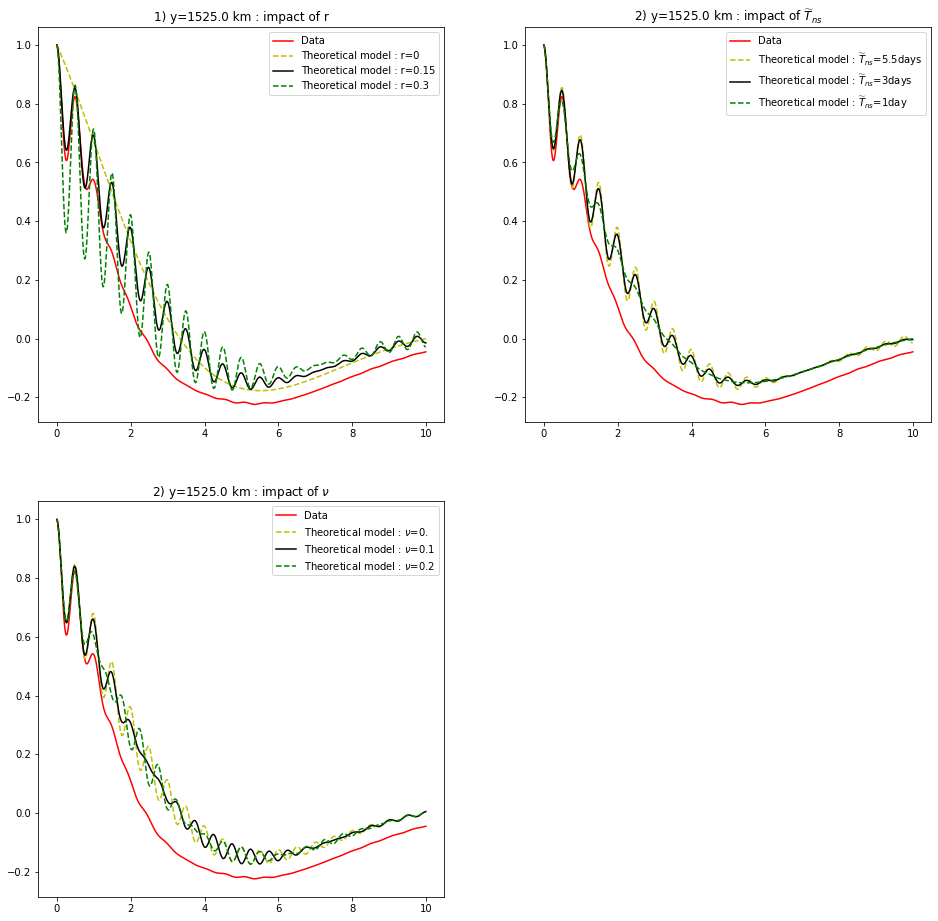

In [32]:
#Varying r: 
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(2,2,1)
ax.set_title(r'1) y=%s km : impact of r'%
             uu.sel(y_bins=1500,method='nearest').y_bins.values)
ax.plot(tau,uu.sel(y_bins=1500,method='nearest'),'r',label='Data')
ax.plot(tau, C(tau,5.5,0.035,3.5,0.075,0),'y--',label='Theoretical model : r=0')
ax.plot(tau, C(tau,5.5,0.035,3.5,0.075,0.15),'k',label='Theoretical model : r=0.15')
ax.plot(tau, C(tau,5.5,0.035,3.5,0.075,0.3),'g--',label='Theoretical model : r=0.3')
plt.legend()
ax = fig.add_subplot(2,2,2)
ax.set_title(r'2) y=%s km : impact of $\widetilde{T}_{ns}$'%
             uu.sel(y_bins=1500,method='nearest').y_bins.values)
ax.plot(tau,y2,'r',label='Data')
ax.plot(tau, C(tau,5.5,0.035,3.5,0.075,0.15),'y--',label='Theoretical model : $\widetilde{T}_{ns}$=5.5days')
ax.plot(tau, C(tau,3,0.035,3.5,0.075,0.15),'k',label='Theoretical model : $\widetilde{T}_{ns}$=3days')
ax.plot(tau, C(tau,1,0.035,3.5,0.075,0.15),'g--',label='Theoretical model : $\widetilde{T}_{ns}$=1day')
plt.legend()
ax = fig.add_subplot(2,2,3)
ax.set_title(r'2) y=%s km : impact of $\nu$'%
             uu.sel(y_bins=1500,method='nearest').y_bins.values)
ax.plot(tau,y2,'r',label='Data')
ax.plot(tau, C(tau,3,0.,3.5,0.075,0.15),'y--',label=r'Theoretical model : $\nu$=0.')
ax.plot(tau, C(tau,3,0.1,3.5,0.075,0.15),'k',label=r'Theoretical model : $\nu$=0.1')
ax.plot(tau, C(tau,3,0.2,3.5,0.075,0.15),'g--',label=r'Theoretical model : $\nu$=0.2')
plt.legend()

#### Comments : 
1) r controls the weight of each component ($\overline{C}$ and $\widetilde{C}$). Consequently we can approximate the value of r using the form of the oscillations. Clearly the effect of the jet dominates here but a value of r=0.15 (black line) seems to be close of the visible oscillations on the data (red line).

2) $\widetilde{T}_{ns}$ controls the decay of the amplitude of the fast oscillations. They are slightly visible at highest timelag so in our example $\widetilde{T}_{ns}$=3days seems the best guess.

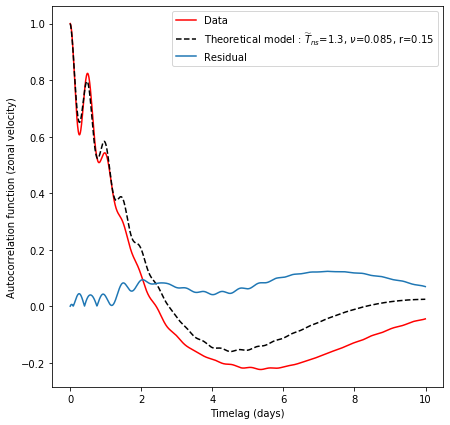

In [149]:
#plt.set_title(r'2) y=%s km : impact of $\nu$'%
#             uu.sel(y_bins=1500,method='nearest').y_bins.values)
plt.figure(figsize=(7,7))
plt.plot(tau,y2,'r',label='Data')
plt.plot(tau, C(tau,1.3,0.085,3.,0.09,0.15),'k--',label=r'Theoretical model : $\widetilde{T}_{ns}$=1.3, $\nu$=0.085, r=0.15')
plt.plot(tau, np.abs(y2-C(tau,1.3,0.085,3.,0.09,0.15)),label='Residual')
plt.legend()
plt.xlabel('Timelag (days)');plt.ylabel('Autocorrelation function (zonal velocity)')
plt.savefig('/Users/zcaspar/Documents/Figs/y2_C.png')

#### Fit using scipy.optimize.curve_fit : 
#### Jet :

In [15]:
fit2 = scipy.optimize.curve_fit(Cbar,tau,y2)#,bounds=((0.,0.),(10.,1.)))[0]
fit2

(array([ 3.07628827, -0.09176911]),
 array([[1.97300372e-03, 1.87284442e-07],
        [1.87284442e-07, 4.20087874e-07]]))

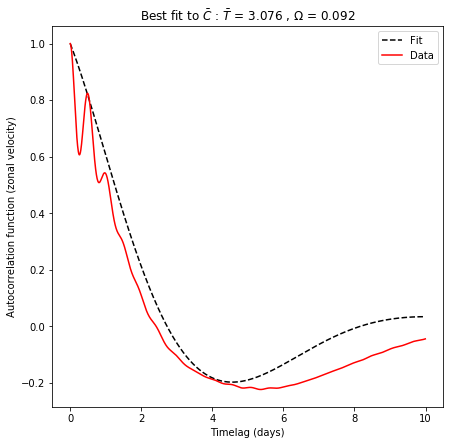

In [155]:
plt.figure(figsize=(7,7))
plt.plot(tau,Cbar(tau,fit2[0],fit2[1]),'k--',label='Fit')
plt.plot(tau,y2,'r',label='Data')
plt.title(r'Best fit to $\bar C$ : $\bar T$ = %s , $\Omega$ = %s'%(np.around(fit2[0], decimals=3),
                                                                   np.around(fit2[1],decimals=3)))
plt.legend()
plt.xlabel('Timelag (days)');plt.ylabel('Autocorrelation function (zonal velocity)')
plt.savefig('/Users/zcaspar/Documents/Figs/y2_fitbar.png')

#### South:

In [156]:
fit1 = scipy.optimize.curve_fit(Ctilde,tau,y1,bounds=((0.,0.),(10.,1.)))[0]

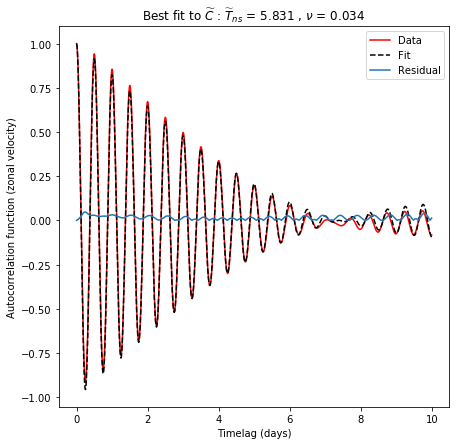

In [181]:
plt.figure(figsize=(7,7))
plt.plot(tau,y1,'r',label='Data')
plt.plot(tau,Ctilde(tau,fit1[0],fit1[1]),'k--',label='Fit')
plt.plot(tau, np.abs(y1-Ctilde(tau,fit1[0],fit1[1])),label='Residual')
plt.title(r'Best fit to $\widetilde{C}$ : $\widetilde{T}_{ns}$ = %s , $\nu$ = %s'%(np.around(fit1[0], decimals=3),
                                                                   np.around(fit1[1],decimals=3)))
plt.legend()
plt.xlabel('Timelag (days)');plt.ylabel('Autocorrelation function (zonal velocity)')
plt.savefig('/Users/zcaspar/Documents/Figs/y1_fittilde.png')

Our approximation was not bad for this one

#### North

In [158]:
fit3 = scipy.optimize.curve_fit(Ctilde,tau,y3,bounds=((0.,0.),(10.,1.)))[0]

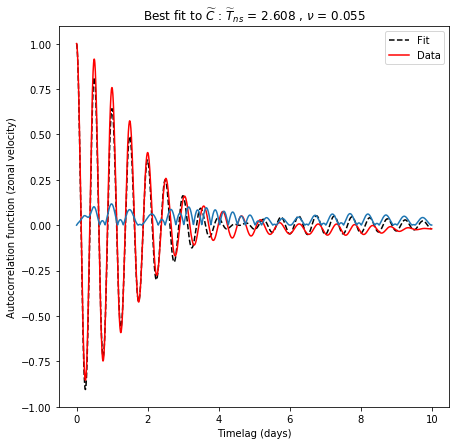

In [159]:
plt.figure(figsize=(7,7))
plt.plot(tau,Ctilde(tau,fit3[0],fit3[1]),'k--',label='Fit')
plt.plot(tau,y3,'r',label='Data')
plt.plot(tau, np.abs(y3-Ctilde(tau,fit3[0],fit3[1])))
plt.title(r'Best fit to $\widetilde{C}$ : $\widetilde{T}_{ns}$ = %s , $\nu$ = %s'%(np.around(fit3[0], decimals=3),
                                                                   np.around(fit3[1],decimals=3)))
plt.legend()
plt.xlabel('Timelag (days)');plt.ylabel('Autocorrelation function (zonal velocity)')
plt.savefig('/Users/zcaspar/Documents/Figs/y3_fittilde.png')

The fit seems better than our approximation but it creates a node that is not in the data to fit the shift in frequency.

### Fit with full formula

In [16]:
fit2C = scipy.optimize.curve_fit(C,tau,y2,bounds=((0.,0.,0.,0.085,0.),(10.,1.,10.,0.095,0.5)))[0]

In [17]:
fit2C

array([5.56717515e-01, 7.30975203e-09, 4.61421019e+00, 8.56039587e-02,
       2.54179780e-01])

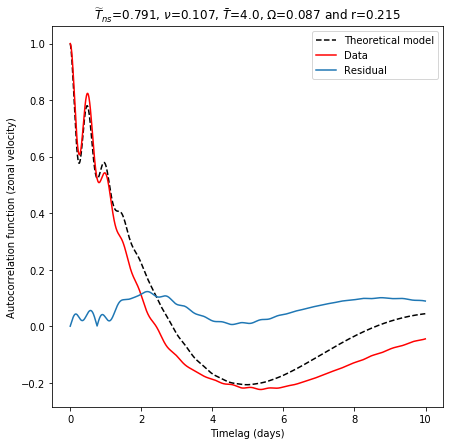

In [184]:
plt.figure(figsize=(7,7))
plt.title(r'$\widetilde{T}_{ns}$=%s, $\nu$=%s, $\bar T$=%s, $\Omega$=%s and r=%s'%
        tuple([np.around(i,decimals=3) for i in fit2C ]))
plt.plot(tau,C(tau,fit2C[0],fit2C[1],fit2C[2],fit2C[3],fit2C[4]),'k--',
         label=r'Theoretical model')
plt.plot(tau,y2,'r',label='Data')
plt.plot(tau,np.abs(y2-C(tau,fit2C[0],fit2C[1],fit2C[2],fit2C[3],fit2C[4])),label='Residual')
plt.legend(bbox_to_anchor=([1,1]))
plt.xlabel('Timelag (days)');plt.ylabel('Autocorrelation function (zonal velocity)')
plt.savefig('/Users/zcaspar/Documents/Figs/y2_fitC.png')

#### Comments:
The problem with a fit with so much variables (5) is that it just search for the best fit without taking into account the small features that may have a significant physical meaning. Here for example there seems to be 2 nodes with slight increase of the amplitude of fast oscillations around $\tau$ = 5 days and $\tau$=9. This is not visible in the output of curve_fit. 

Here I blocked the values of $\bar T$ and $\Omega$ around the ones found with the first fit (with only $\bar C$) wothout this constraints the results are meaningless. It will be important to set carefully  the bounds in the future.

In [12]:
fit4 = scipy.optimize.curve_fit(C,tau,y4,bounds=((0.,0.,0.,0.,0.),(10.,1.,4.,0.095,1)))[0]

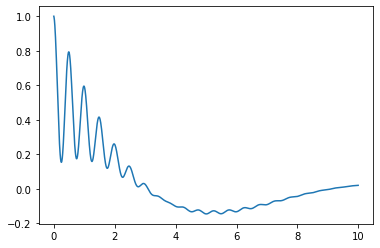

In [13]:
plt.plot(tau,C(tau,fit4[0],fit4[1],fit4[2],fit4[3],fit4[4]),'')